## PY01_EDA_CreditosConsumo



- **Objetivo:** _Identificar patrones relevantes de los Clientes que indiquen si un crédito otorgado terminará siendo pagado o no._
- **Nombre de la Evaluación de Auditoría:** Evaluación sobre Créditos Otorgados 
- **Team:** Banca Minorista
- **Riesgo:**   Posibilidad que exista inadecuadas pautas de evaluación de créditos dado la alta concentración de créditos con impago
- **Control:**  Evaluación mensual de las pautas del producto.
- **Creador:**  Aldair Espinoza
- **Fecha de Creación:** 25/01/2023
- **Versión de código:** 1.0
- **Nombre de la prueba en Python:**  PY01_EDA_CreditosConsumo
- **Fuentes de Datos:**  En el Anexo 2 se detalla la lista de fuentes que se utilizaran en el desarrollo de la prueba.
---



## **Pasos para desarrollar**

0. [Importación de Librerías](#imp_lib)
1. [Defininición del problema](#def_prob)
2. [Carga y Limpieza de datos](#limpieza_datos)<br>
    2.1. [Carga de Datos](#carga_datos)<br>
    2.2. [Columnas sin valores](#datos_sin_valor)<br>
    2.3. [Registros Duplicados](#duplicados)<br>
    2.4. [Datos Irrelevantes](#datos_irre)<br>
    2.5. [Conversion de Tipo de Datos](#conversion_tipos)<br>
    2.6. [Estandarizar formato de Texto](#estandar_texto)<br>
    2.7. [Gestionar los nulos](#datos_nulos)<br>
3. [Análisis Exploratorio de Datos (EDA)](#EDA)<br>
    3.1. [Análisis Univariado](#analisis_univ)<br>
    3.2. [Imputacion y Tranformación de Variables](#imp_trans)<br>
    3.3. [Análisis Bivariado](#analisis_biv)<br>
4. [Conclusiones](#conclusion)<br>

### <a id="imp_lib" style="color:black">0. Importación de Librerías</a>


In [1]:
#!pip install seaborn==0.9.0

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objs as go
import missingno as msno

import sklearn as skl
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

import warnings 
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

In [73]:
#VERSIONES DE LAS LIBRERIAS
print('=======VERSIONES DE LAS LIBRERIAS UTILIZADAS=========\n')
print('pandas: '+pd.__version__)
print('numpy: '+np.__version__)
print('sklearn: '+skl.__version__)
print('matplotlib: '+mpl.__version__)
print('seaborn: '+sns.__version__)

=======VERSIONES DE LAS LIBRERIAS UTILIZADAS=========

pandas: 1.2.4
numpy: 1.22.4
sklearn: 0.24.1
matplotlib: 3.3.4
seaborn: 0.11.1


### <a id="def_prob" style="color:black">1. Definición del Problema</a> 
- **Comprensión del caso:**

Las instituciones financieras tienen dificultades para otorgar préstamos a las personas debido a su historial crediticio insuficiente o inexistente. Por eso, algunos consumidores lo usan como su ventaja al convertirse en morosos. El banco "PANDAS", se especializa en otorgar varios tipos de préstamos a personas naturales, entre ellos los créditos efectivos y consumo sobre los que se abordará el caso. 

- **Problema**

Se requiere analizar los patrones presentes en los datos recopilados de los préstamos. Esto asegurará que los solicitantes capaces de pagar el préstamo no sean rechazados.

Cuando la empresa recibe una solicitud de préstamo, la empresa debe decidir la aprobación del préstamo en función del perfil del solicitante, y los tipos de riesgos están asociados con la decisión del banco son:

    - Si es probable que el solicitante reembolse el préstamo, entonces la no aprobación del préstamo resulta en una pérdida 
    de negocio para la empresa.
    - Si no es probable que el solicitante reembolse el préstamo, es decir, es probable que incumpla, la aprobación del 
    préstamo puede generar una pérdida financiera para la empresa.

Los datos que se proporcionan a continuación contienen la información sobre la solicitud del último préstamo realizado con el cliente(estos se encuentran en primer dataset), y también con los créditos anteriores al último(este se encuentra en segundo dataset).

- **Objetivo**

Este caso de estudio tiene como objetivo identificar patrones que indiquen si un cliente tiene dificultades para pagar sus cuotas, que pueden usarse para tomar acciones como negar el préstamo, reducir el monto del préstamo, prestar (a solicitantes de riesgo) a una tasa de interés más alta, etc. Esto asegurará que los consumidores capaces de pagar el préstamo no sean rechazados. 

La identificación de dichos solicitantes utilizando EDA es el objetivo de este estudio de caso.
En otras palabras, la empresa quiere comprender las variables que más relevancia tienen detrás del incumplimiento del préstamo, es decir, las variables que son fuertes indicadores de incumplimiento. La empresa puede utilizar este conocimiento para su cartera y evaluación de riesgos.

### <a id="limpieza_datos" style="color:black">2. Carga y Limpieza de datos</a> 

#### <a id="carga_datos" style="color:black">2.1. Carga de datos</a> 

En el primer dataset (data_creditos) se tiene la información sobre el último crédito solicitado por el cliente, asimismo también tiene la variable que indica si el crédito terminó pagandose o no. 

In [3]:
%%time

df=pd.read_excel('data/data_creditos.xlsx')

print('Tenemos {} filas y {} columnas en nuestro primer dataset.'.format(df.shape[0],df.shape[1]))

Tenemos 320955 filas y 19 columnas en nuestro primer dataset.
Wall time: 2min 30s


In [77]:
df.head(2)

,id_credito,pago_atrasado,tipo_contrato,flg_auto,flg_propiedad,cant_hijos,ingreso,mto_credito,mto_cuota,nivel_educativo,...,dias_nacimiento,dias_empleo,cant_miemb_familia,edad,edad_grupo,tiempo_empleo,tiempo_empleo_grupo,ingreso_rango,mto_credito_rango,cantidad_creditos_previos
0,100002.0,1.0,CREDITO EFECTIVO,0,1,0.0,2.025,4.065975,24700.5,SECUNDARIA,...,9461.0,637.0,1.0,25.0,20-30,1.0,0-5,200k-250k,400k-500k,0
1,100003.0,0.0,CREDITO EFECTIVO,0,0,0.0,2.700,12.935025,35698.5,UNIVERSIDAD,...,16765.0,1188.0,2.0,45.0,40-50,3.0,0-5,250k-300k,1M Above,2


En el segundo dataset (data_creditos_pasados) se tiene la información sobre los créditos del clientes anteriores al último solicitado, es decir desde el penúltimo crédito hacia atrás y sus respectivas variables.

In [5]:
df_hist=pd.read_csv('data_creditos_pasados.csv')

print('Tenemos {} filas y {} columnas en nuestro segundo dataset.'.format(df_hist.shape[0],df_hist.shape[1]))

Tenemos 1296355 filas y 6 columnas en nuestro segundo dataset.


In [6]:
df_hist.head(3)

,id_credito_prev,id_credito,tipo_contrato,mto_credito,mto_cuota,fecha_credito_pasado
0,2030495,271877,Credito Consumo,17145.0,1730.430,NaN
1,2802425,108129,Credito Efectivo,679671.0,25188.615,NaN
2,2523466,122040,Credito Efectivo,136444.5,15060.735,NaN


#### <a id="datos_sin_valor" style="color:black">2.2. Columnas sin valores</a> 

Se indentifican aquellas variables sin valores para eliminarlas.

In [7]:
#Funcion para identificar variables con todos sus valores nulos

def func_col_nulos(df):
    total = len(df)
    lista_nulos = []
    for col in list(df.columns):
        if df[col].isnull().sum() == total:
            lista_nulos.append(col)
    return lista_nulos

In [8]:
print('En el primer DataFrame se tienen las siguientes variables con todas sus columnas nulas:')
print(func_col_nulos(df))

print('\n')

print('En el segundo DataFrame se tienen las siguientes variables con todas sus columnas nulas:')
func_col_nulos(df_hist)

En el primer DataFrame se tienen las siguientes variables con todas sus columnas nulas:
['empleo_sector', 'genero']


En el segundo DataFrame se tienen las siguientes variables con todas sus columnas nulas:


['fecha_credito_pasado']

- A continuación se eliminarán las columnas identificadas con solamente valores nulos

In [9]:
df.drop(['empleo_sector', 'genero'], axis = 1, inplace=True)

df_hist.drop(['fecha_credito_pasado'], axis = 1, inplace=True)

In [86]:
# Y &
# O |
#NO CONDICIONAL ~
df[(df['nivel_educativo'].isin(['Secundaria','Primaria']))|~(df['flg_auto']=='S')]

,id_credito,pago_atrasado,tipo_contrato,flg_auto,flg_propiedad,cant_hijos,ingreso,mto_credito,mto_cuota,nivel_educativo,...,dias_nacimiento,dias_empleo,cant_miemb_familia,edad,edad_grupo,tiempo_empleo,tiempo_empleo_grupo,ingreso_rango,mto_credito_rango,cantidad_creditos_previos
0,100002.0,1.0,CREDITO EFECTIVO,0,1,0.0,2.025,4.065975,24700.5,SECUNDARIA,...,9461.0,637.0,1.0,25.0,20-30,1.0,0-5,200k-250k,400k-500k,0
1,100003.0,0.0,CREDITO EFECTIVO,0,0,0.0,2.700,12.935025,35698.5,UNIVERSIDAD,...,16765.0,1188.0,2.0,45.0,40-50,3.0,0-5,250k-300k,1M Above,2
2,100004.0,0.0,CREDITO CONSUMO,1,1,0.0,0.675,1.350000,6750.0,SECUNDARIA,...,19046.0,225.0,1.0,52.0,50 above,0.0,0-5,50K-100K,100K-200K,0
3,100006.0,0.0,CREDITO EFECTIVO,0,1,0.0,1.350,3.126825,29686.5,SECUNDARIA,...,19005.0,3039.0,2.0,52.0,50 above,8.0,5-10,100k-150k,300k-400k,4 above
4,100007.0,0.0,CREDITO EFECTIVO,0,1,0.0,1.215,5.130000,21865.5,SECUNDARIA,...,19932.0,3038.0,1.0,54.0,50 above,8.0,5-10,100k-150k,500k-600k,4 above
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307494,456251.0,0.0,CREDITO EFECTIVO,0,0,0.0,1.575,2.547000,27558.0,SECUNDARIA,...,9327.0,236.0,1.0,25.0,20-30,0.0,0-5,150k-200k,200k-300k,0
307495,456252.0,0.0,CREDITO EFECTIVO,0,1,0.0,0.720,2.695500,12001.5,SECUNDARIA,...,20775.0,365243.0,1.0,56.0,50 above,1000.0,60 above,50K-100K,200k-300k,0
307496,456253.0,0.0,CREDITO EFECTIVO,0,1,0.0,1.530,6.776640,29979.0,UNIVERSIDAD,...,14966.0,7921.0,1.0,41.0,40-50,21.0,20-30,150k-200k,600k-700k,1
307497,456254.0,1.0,CREDITO EFECTIVO,0,1,0.0,1.710,3.701070,20205.0,SECUNDARIA,...,11961.0,4786.0,2.0,32.0,30-40,13.0,10-20,150k-200k,300k-400k,1


#### <a id="duplicados" style="color:black">2.3. Registros Duplicados</a> 

Se indentifican si existen filas duplicadas para eliminar la duplicidad 

In [87]:
#Se define la funcion para identificar duplicados
def func_duplicados(df):
    total = len(df)
    unicos = len(df.drop_duplicates())
    
    print('Se tienen '+str(total-unicos)+' registros duplicados')    

In [12]:
#
len(df)-df.id_credito.nunique()

13456

In [13]:
len(df)-len(df[['id_credito','tipo_contrato']].drop_duplicates())

13456

In [14]:
print('En el primer DataFrame se tiene: ')
func_duplicados(df)

print('\n')

print('En el segundo DataFrame se tiene: ')
func_duplicados(df_hist)

En el primer DataFrame se tiene: 
Se tienen 13456 registros duplicados


En el segundo DataFrame se tiene: 
Se tienen 0 registros duplicados


- Se procede a eliminar los duplicados del DataFrame correspondiente

In [15]:
df.drop_duplicates(inplace = True)

#### <a id="datos_irre" style="color:black">2.4. Datos Irrelevantes</a> 

Se eliminan los datos irrelevantes para el análisis

- Del primer DataFrame se eliminarán las variables de dia_inicio_proceso y hora_inicio_proceso dado que no son relevantes para el análisis

In [16]:
df.drop(['dia_inicio_proceso','hora_inicio_proceso'], axis = 1 ,inplace = True)

#### <a id="conversion_tipos" style="color:black">2.5. Conversion de Tipo de Datos</a> 

- A continuación identificaremos los tipos de dato del dataset para validar si son correctos o no.

In [17]:
df.dtypes

id_credito              int64
pago_atrasado           int64
tipo_contrato          object
flg_auto               object
flg_propiedad          object
cant_hijos              int64
ingreso               float64
mto_credito           float64
mto_cuota             float64
nivel_educativo        object
estado_civil           object
tipo_propiedad         object
dias_nacimiento         int64
dias_empleo             int64
cant_miemb_familia    float64
dtype: object

In [18]:
df_hist.dtypes

id_credito_prev      int64
id_credito           int64
tipo_contrato       object
mto_credito        float64
mto_cuota          float64
dtype: object

- Función para agrupar las variables por tipo de datos

In [88]:
def cols_type_analysis(df):
    isNumeric = df.select_dtypes(include = np.number).columns.tolist()
    isObjexct= df.select_dtypes(include= object ).columns.tolist()
    isBool = df.select_dtypes(include= bool ).columns.tolist()
    print("**Todas las columnas con value type:", len(df.columns)==len(isNumeric)+len(isObject)+len(isBool) )
    
    return isNumeric, isObject, isBool

print('--------------Tipo de variables de Data de Creditos--------------')
isNumeric, isObject, isBool = cols_type_analysis(df)
print("----------------------------------")
print("**Variables numéricas:", isNumeric)
print("----------------------------------")
print("**Variables string:", isObject)
print("----------------------------------")
print("**Variables bool:", isBool)

print('\n\n')
print('--------------Tipo de variables de Data de Creditos Historicos--------------')
isNumeric_hist, isObject_hist, isBool_hist = cols_type_analysis(df_hist)
print("----------------------------------")
print("**Variables numéricas:", isNumeric_hist)
print("----------------------------------")
print("**Variables string:", isObject_hist)
print("----------------------------------")
print("**Variables bool:", isBool_hist)

--------------Tipo de variables de Data de Creditos--------------
**Todas las columnas con value type: False
----------------------------------
**Variables numéricas: ['pago_atrasado', 'flg_auto', 'flg_propiedad', 'cant_hijos', 'ingreso', 'mto_credito', 'mto_cuota', 'dias_nacimiento', 'dias_empleo', 'cant_miemb_familia', 'edad', 'tiempo_empleo']
----------------------------------
**Variables string: ['id_credito', 'tipo_contrato', 'nivel_educativo', 'estado_civil', 'tipo_propiedad']
----------------------------------
**Variables bool: []



--------------Tipo de variables de Data de Creditos Historicos--------------
**Todas las columnas con value type: True
----------------------------------
**Variables numéricas: ['cantidad_creditos_previos']
----------------------------------
**Variables string: ['id_credito']
----------------------------------
**Variables bool: []


In [20]:
#Se definen variables que cambiaran de tipo

def val_type(df, cols_num, type_sel):  
    df[cols_num] = df[cols_num].astype(type_sel)
    print("**Asignación de tipo:", type_sel)
    return df

datos = val_type(df, isNumeric, float)
datos = val_type(df, ['id_credito'], str)

print('--------------Tipo de variables de Data de Creditos--------------')

isNumeric, isObject, isBool = cols_type_analysis(df)
print("----------------------------------")
print("**Variables numéricas:", isNumeric)
print("----------------------------------")
print("**Variables string:", isObject)
print("----------------------------------")

print('\n\n')

print('--------------Tipo de variables de Data de Creditos Historico--------------')

datos = val_type(df_hist, isNumeric_hist, float)
datos = val_type(df_hist, ['id_credito_prev','id_credito'], str)

isNumeric_hist, isObject_hist, isBool_hist = cols_type_analysis(df_hist)
print("----------------------------------")
print("**Variables numéricas:", isNumeric_hist)
print("----------------------------------")
print("**Variables string:", isObject_hist)
print("----------------------------------")

**Asignación de tipo: <class 'float'>
**Asignación de tipo: <class 'str'>
--------------Tipo de variables de Data de Creditos--------------
**Todas las columnas con value type: True
----------------------------------
**Variables numéricas: ['pago_atrasado', 'cant_hijos', 'ingreso', 'mto_credito', 'mto_cuota', 'dias_nacimiento', 'dias_empleo', 'cant_miemb_familia']
----------------------------------
**Variables string: ['id_credito', 'tipo_contrato', 'flg_auto', 'flg_propiedad', 'nivel_educativo', 'estado_civil', 'tipo_propiedad']
----------------------------------



--------------Tipo de variables de Data de Creditos Historico--------------
**Asignación de tipo: <class 'float'>
**Asignación de tipo: <class 'str'>
**Todas las columnas con value type: True
----------------------------------
**Variables numéricas: ['mto_credito', 'mto_cuota']
----------------------------------
**Variables string: ['id_credito_prev', 'id_credito', 'tipo_contrato']
----------------------------------


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Obs: </b>Se corrigió la tipología de las siguientes variables:
        <ol>
            <li>A las variables numéricas se les asignó tipo de dato 'Float', para que reconozca tanto la parte entera como la decimal </li>
            <li>A las variables que estamos utilizando como llave: 'id_credito' y 'id_credito_prev', si bien son números, estos están asociados al código del crédito por lo cual corresponde tratarlos como variables tipo string o cadena.
      
 
<p>

</p>

#### <a id="estandar_texto" style="color:black">2.6. Estandarizar formato de Texto</a> 

- Se realiza una revisión sobre las variables categóricas para ver su consistencia y corregirlas si corresponde.

In [21]:
# Se define la funcion para ver los valores unicos por variable

def func_val_uniq(df, features):
    for feature in features:
        print('La variable '+feature+' tiene los siguientes valores unicos: ')
        print(list(df[feature].unique()))
        print('')c

In [22]:
cat_features_df = ['tipo_contrato', 'flg_auto', 'flg_propiedad', 
                   'nivel_educativo', 'estado_civil', 'tipo_propiedad']

cat_features_df_hist = ['tipo_contrato']

In [23]:
func_val_uniq(df, cat_features_df) 

La variable tipo_contrato tiene los siguientes valores unicos: 
['Credito Efectivo', 'Credito Consumo']

La variable flg_auto tiene los siguientes valores unicos: 
['N', 'S']

La variable flg_propiedad tiene los siguientes valores unicos: 
['S', 'N']

La variable nivel_educativo tiene los siguientes valores unicos: 
['Secundaria', 'Universidad', 'secundaria', nan, 'Universidad Incompleta', 'universitaria', 'Primaria', 'Maestria']

La variable estado_civil tiene los siguientes valores unicos: 
['Soltero', 'Casado', 'Viudo', 'Divorciado', 'Desconocido']

La variable tipo_propiedad tiene los siguientes valores unicos: 
['Casa', 'Departamento Rentado', 'Con Padres', 'Departamento']



In [24]:
func_val_uniq(df_hist, cat_features_df_hist) 

La variable tipo_contrato tiene los siguientes valores unicos: 
['Credito Consumo', 'Credito Efectivo']



<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Obs: </b>Se tienen las siguientes correcciones para realizar:
        <ol>
            <li>En la variable de nivel educativo se tiene Universidad y universitaria, que indican lo mismo</li>
            <li>En la variable de nivel educativo se tiene Secundaria y secundaria(escrita la primera con una mayuscula inicial)</li>
        </ol>
        Las correciones a realizar serán unificar en un solo valor aquellas variables que tengan valores que signifiquen lo mismo(punto 1) y cambiar todas las variables categoricas a mayusculas para estandarizarlas(punto 2, pero también se realizará para las demás variables)
    </span>    
</div>
<p>

</p>

In [25]:
df.loc[df['nivel_educativo'] == 'Universidad','nivel_educativo']

1         Universidad
6         Universidad
7         Universidad
10        Universidad
19        Universidad
             ...     
307484    Universidad
307488    Universidad
307491    Universidad
307496    Universidad
307498    Universidad
Name: nivel_educativo, Length: 68061, dtype: object

In [26]:
#Se corrige la variable de nivel educativo para unificar universidad
df.loc[df['nivel_educativo'] == 'universitaria', 'nivel_educativo'] = 'Universidad'

                 # FILTRO                      #COLUMNA A MODIFICAR       #VALOR 

print('Se verifica que solo hay 1 valor que hace referencia al nivel Universidad:')
print(list(df.nivel_educativo.unique()))

Se verifica que solo hay 1 valor que hace referencia al nivel Universidad:
['Secundaria', 'Universidad', 'secundaria', nan, 'Universidad Incompleta', 'Primaria', 'Maestria']


In [27]:
#Se define funcion para transformar las variables categoricas a mayusculas

def fun_mayusc(df, features):
    
    for feature in features:
        df[feature] = df[feature].str.upper() # lower()

    return df    

In [28]:
df = fun_mayusc(df, cat_features_df)

df_hist = fun_mayusc(df_hist, cat_features_df_hist)

In [29]:
print('Se verifica que se transformaron a mayuscula:')
print(list(df.nivel_educativo.unique()))

Se verifica que se transformaron a mayuscula:
['SECUNDARIA', 'UNIVERSIDAD', nan, 'UNIVERSIDAD INCOMPLETA', 'PRIMARIA', 'MAESTRIA']


#### <a id="datos_nulos" style="color:black">2.7. Gestionar los nulos</a> 

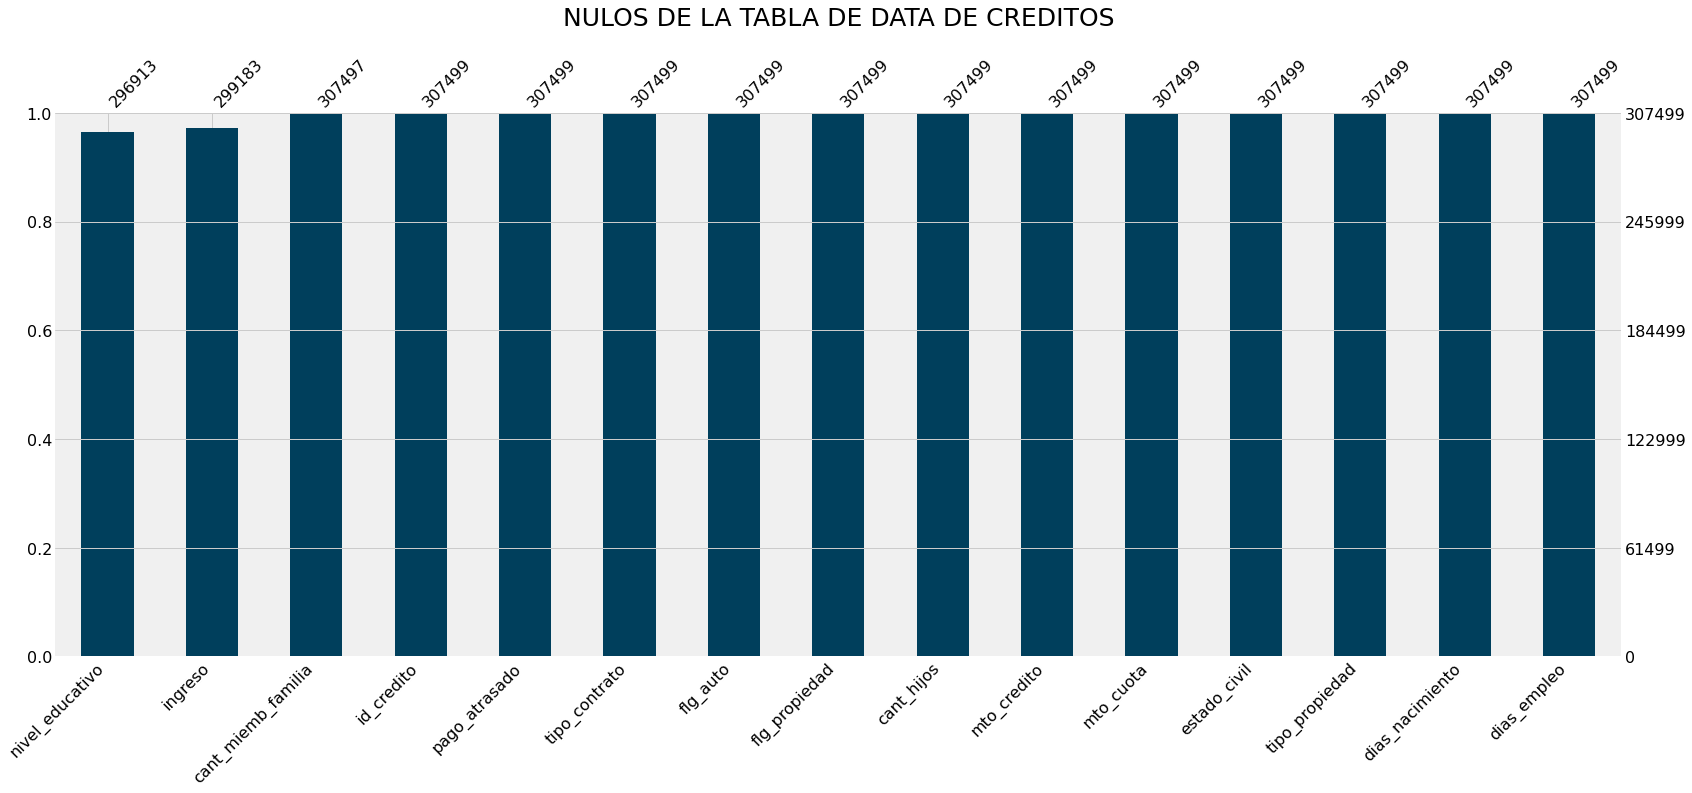

In [30]:
plt.title('NULOS DE LA TABLA DE DATA DE CREDITOS',y=1.15, fontsize = 25)
msno.bar(df,sort="ascending",color='#003f5c');

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Del gráfico superior podemos observar que hay 3 variables con valores nulos
    </span>    
</div>

In [31]:
df.shape[0]

307499

In [32]:
round(df.isnull().sum() / df.shape[0] * 100.00,8)

id_credito            0.000000
pago_atrasado         0.000000
tipo_contrato         0.000000
flg_auto              0.000000
flg_propiedad         0.000000
cant_hijos            0.000000
ingreso               2.704399
mto_credito           0.000000
mto_cuota             0.000000
nivel_educativo       3.442613
estado_civil          0.000000
tipo_propiedad        0.000000
dias_nacimiento       0.000000
dias_empleo           0.000000
cant_miemb_familia    0.000650
dtype: float64

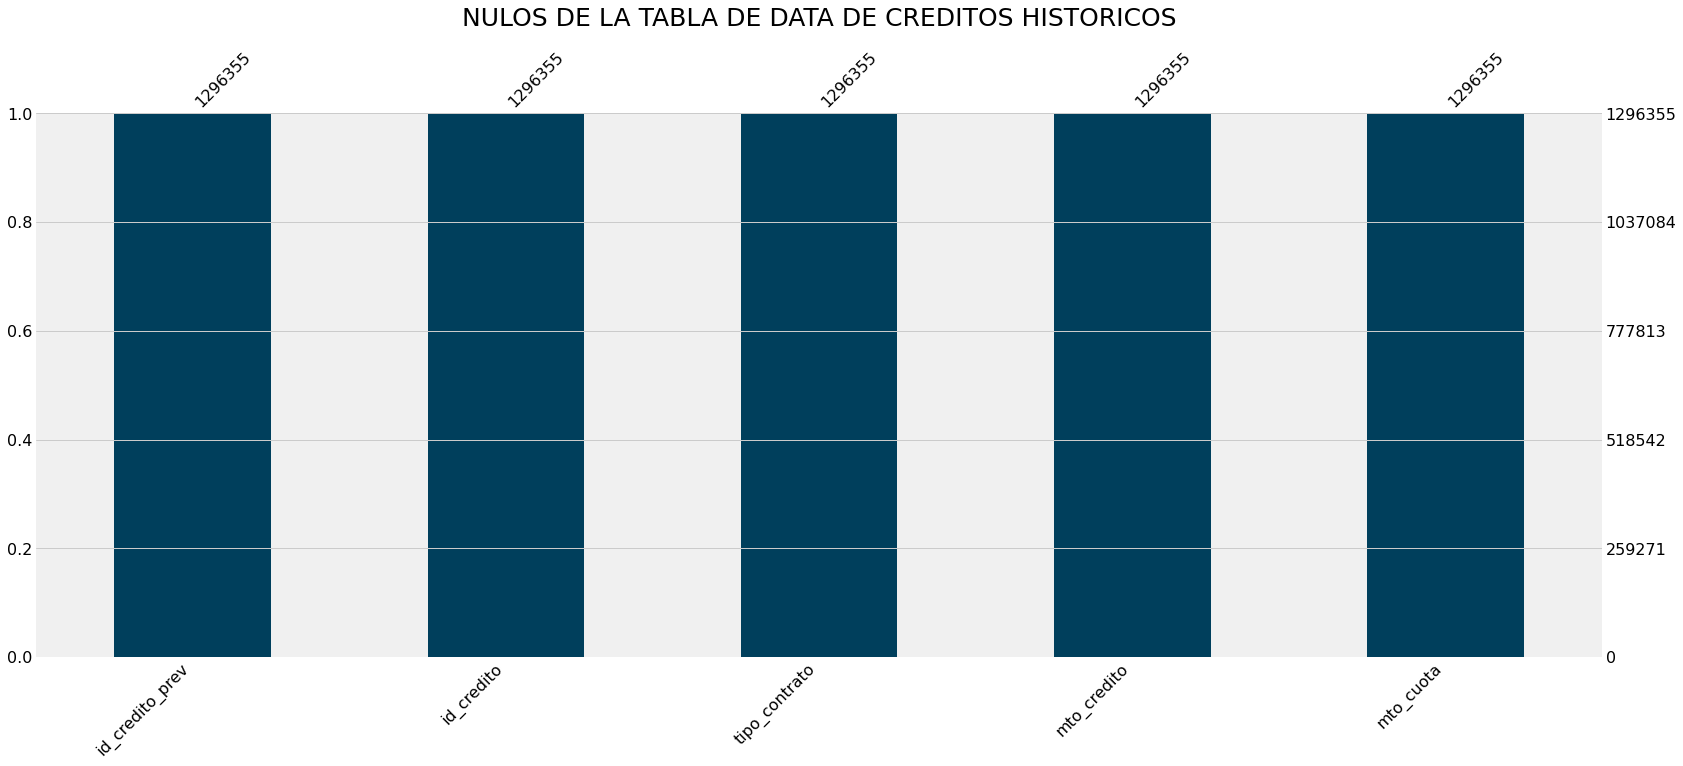

In [33]:
plt.title('NULOS DE LA TABLA DE DATA DE CREDITOS HISTORICOS',y=1.15, fontsize = 25)
msno.bar(df_hist,sort="ascending",color='#003f5c');

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Del gráfico superior podemos observar no se presentan valores nulos.
    </span>    
</div>

### <a id="EDA" style="color:black">3. Análisis Exploratorio de Datos (EDA)</a> 

#### <a id="analisis_univ" style="color:black">3.1. Análisis Univariado</a> 

In [34]:
df.describe()

,pago_atrasado,cant_hijos,ingreso,mto_credito,mto_cuota,dias_nacimiento,dias_empleo,cant_miemb_familia
count,307499.000000,307499.000000,2.991830e+05,3.074990e+05,307499.000000,307499.000000,307499.000000,307497.000000
mean,0.080732,0.417068,1.688119e+05,5.990273e+05,27108.573909,16037.054212,67727.297338,2.152681
std,0.272423,0.722131,2.398975e+05,4.024927e+05,14493.737315,4364.000425,139445.872543,0.910692
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,7489.000000,0.000000,1.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,12413.000000,933.000000,2.000000
50%,0.000000,0.000000,1.462500e+05,5.135310e+05,24903.000000,15750.000000,2219.000000,2.000000
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,19682.000000,5707.000000,3.000000
max,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,25229.000000,365243.000000,20.000000


In [35]:
len(df)

307499

In [36]:
#df[df['dias_empleo']==365243.000000]

In [37]:
df_hist.describe()

,mto_credito,mto_cuota
count,1.296355e+06,1.296355e+06
mean,2.505183e+05,1.597511e+04
std,3.423179e+05,1.478060e+04
min,5.139000e+03,0.000000e+00
25%,5.310000e+04,6.340995e+03
50%,1.199250e+05,1.125000e+04
75%,2.729700e+05,2.067849e+04
max,4.509688e+06,4.180581e+05


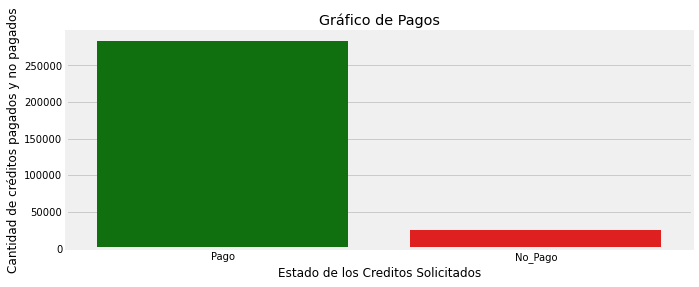

In [38]:
Imbalance = df["pago_atrasado"].value_counts().reset_index()

plt.figure(figsize=(10,4))
x= ['Pago','No_Pago']
sns.barplot(x,"pago_atrasado",data = Imbalance,palette= ['g','r'])
plt.xlabel("Estado de los Creditos Solicitados")
plt.ylabel("Cantidad de créditos pagados y no pagados")
plt.title("Gráfico de Pagos")
plt.show()

In [39]:
count_0 = Imbalance.iloc[0]["pago_atrasado"]
count_1 = Imbalance.iloc[1]["pago_atrasado"]
count_0_perc = round(count_0/(count_0+count_1)*100,2)
count_1_perc = round(count_1/(count_0+count_1)*100,2)

print('Ratio de créditos pagados en porcentaje respecto a los que no fueron pagados es: %.2f and %.2f'%(count_0_perc,count_1_perc))
print('Ratio de créditos pagados en proporcion respecto a los que no fueron pagados es %.2f : 1 (aprox)'%(count_0/count_1))

Ratio de créditos pagados en porcentaje respecto a los que no fueron pagados es: 91.93 and 8.07
Ratio de créditos pagados en proporcion respecto a los que no fueron pagados es 11.39 : 1 (aprox)


In [40]:
# Se define la funcion para el univariado de variables numericas

def UVA_numeric(data, var_group):
    
    size = len(var_group)
    plt.figure(figsize = (7*size,3), dpi = 100)
  
  #loop por cada variable
    for j,i in enumerate(var_group):
        
        # se calcula descriptivos de cada variable
        mini = data[i].min()
        maxi = data[i].max()
        ran = data[i].max()-data[i].min()
        mean = data[i].mean()
        median = data[i].median()
 
        #Grafico con la informacion de la variable
        plt.subplot(1,size,j+1)
        sns.kdeplot(data[i], shade=True)
        sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
        sns.scatterplot([mean], [0], color = 'red', label = "mean")
        sns.scatterplot([median], [0], color = 'green', label = "median")
        plt.xlabel('{}'.format(i), fontsize = 20)
        plt.ylabel('density')
        plt.title('range = {}\nmean = {}; median = {}'.format((round(mini,2),round(maxi,2),round(ran,2)),
                                                              round(mean,2),
                                                              round(median,2)))
        
# Se define la funcion para el univariado de variables categoricas
def UVA_category(data, var_group):
    
    # Se establece el tamaño del grafico
    size = len(var_group)
    plt.figure(figsize = (7*size,5), dpi = 100)

    # Se itera por cada variable
    for j,i in enumerate(var_group):
        norm_count = round(data[i].value_counts(normalize = True),2)
        n_uni = data[i].nunique()

  #Grafica con info de cada variable
        plt.subplot(1,size,j+1)
        sns.barplot(norm_count, norm_count.index , order = norm_count.index)
        plt.xlabel('fraction/percent', fontsize = 20)
        plt.ylabel('{}'.format(i), fontsize = 20)
        plt.title('valores_unicos = {} \n Cantidad \n {};'.format(n_uni,norm_count))

In [41]:
features_df_numeric = ['cant_hijos','ingreso','mto_credito','mto_cuota','dias_nacimiento','dias_empleo']

features_df_cat = ['tipo_contrato','flg_auto','flg_propiedad','nivel_educativo','estado_civil','tipo_propiedad']

-------------------------------VARIABLES NUMERICAS DE DATA DE CREDITOS-------------------------------


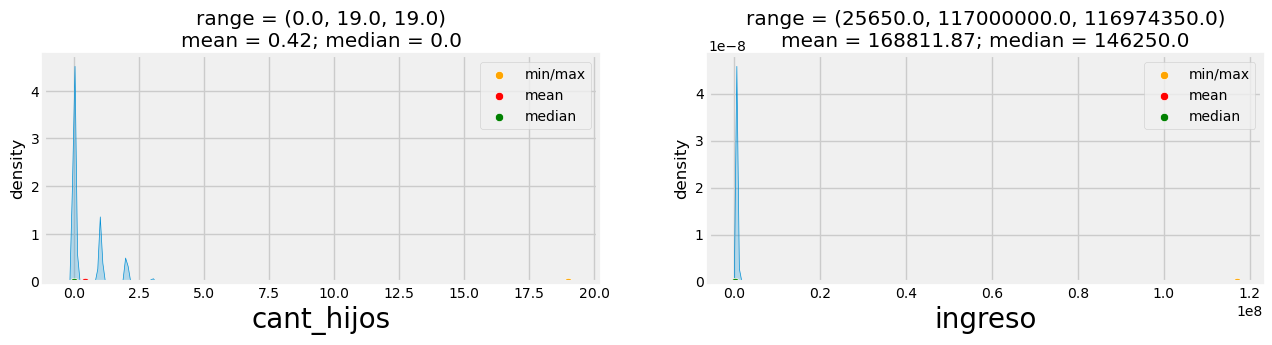

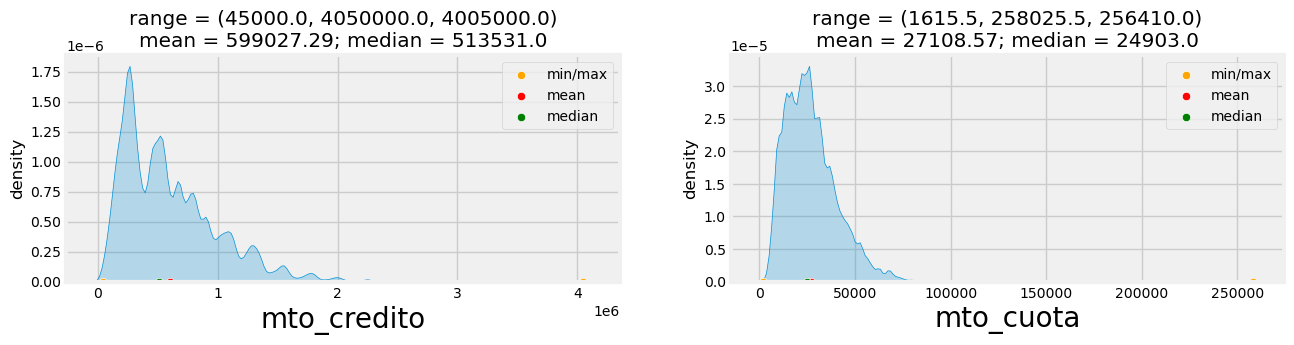

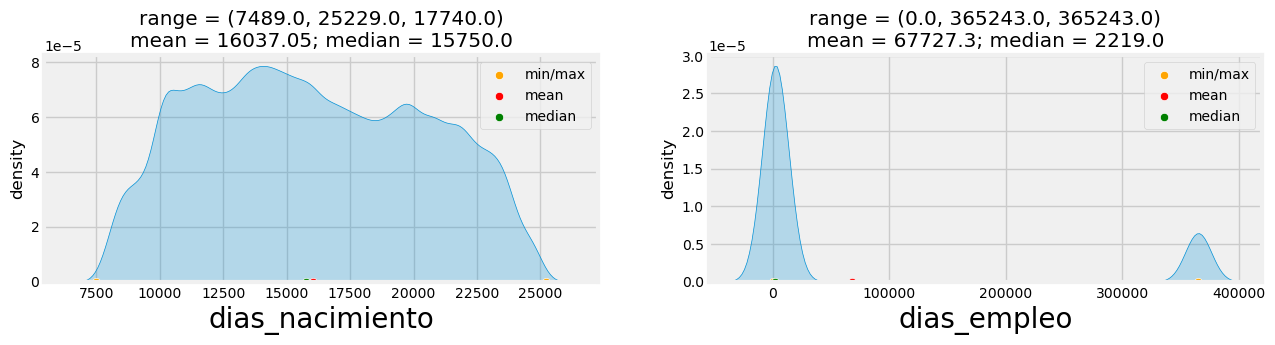

In [42]:
print('-------------------------------VARIABLES NUMERICAS DE DATA DE CREDITOS-------------------------------')
UVA_numeric(df, features_df_numeric[0:2])
UVA_numeric(df, features_df_numeric[2:4])
UVA_numeric(df, features_df_numeric[4:])

<AxesSubplot:xlabel='ingreso'>

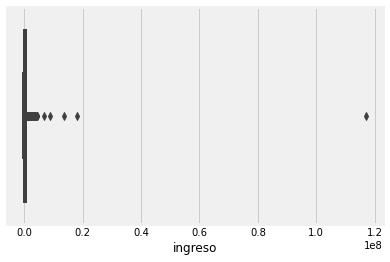

In [43]:
sns.boxplot(df.ingreso)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b>De los gráficos superiores se puede observar los siguiente:
    <br>
        <ol>
            <li>En la Data de Creditos, las variables de cantidad de hijos, ingresos,  monto de credito, cuota de credito y dias de empleo presentan outliers, lo que nos indica que en caso de tener nulos, deberán imputarse con la mediana</li>
            <li>La variable de ingresos presenta un gran numero de outliers, lo que indica que solo pocos clientes que aplican a los creditos tienen un alto ingreso cuando se compara con el resto.</li>
            <li>La edad NO presenta outliers, por lo cual esa variable es consistente.</li>
        </ol>        
    </span>    
</div>


- Se graficará las variables con outliers, pero hasta el percentil 0.95 para ver qué tipo de agrupamiento se puede realizar sobre estas.

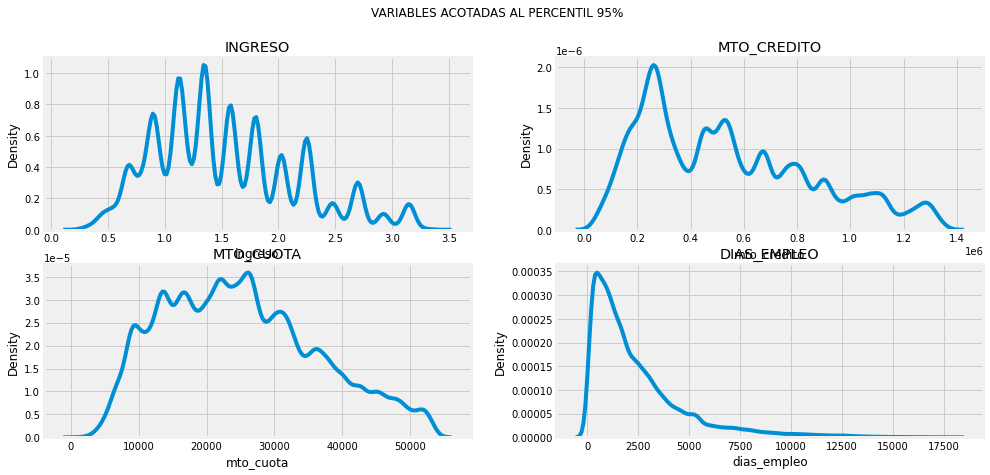

In [44]:
fig, axes = plt.subplots(2, 2, figsize=(15, 7))
fig.suptitle('VARIABLES ACOTADAS AL PERCENTIL 95%')

# Ingreso
sns.kdeplot(ax=axes[0,0] ,data=df[df['ingreso']<df.ingreso.quantile(0.95)]['ingreso']/100000) 
axes[0,0].set_title('INGRESO')


# Monto Credito
sns.kdeplot(ax=axes[0,1] ,data=df[df['mto_credito']<df.mto_credito.quantile(0.95)]['mto_credito'])
axes[0,1].set_title('MTO_CREDITO')

# Monto Cuota
sns.kdeplot(ax=axes[1,0] ,data=df[df['mto_cuota']<df.mto_cuota.quantile(0.95)]['mto_cuota'])
axes[1,0].set_title('MTO_CUOTA')

# Dias Empleo
sns.kdeplot(ax=axes[1,1] ,data=df[df['dias_empleo']<df.dias_empleo.quantile(0.95)]['dias_empleo'])
axes[1,1].set_title('DIAS_EMPLEO');


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b>De los gráficos superiores se puede observar los siguiente:
    <br>
        <ol>
            <li>Las variables presentan distribuciones multimodales, por lo que podría establecerse rangos de agrupación con intervalos constantes </li>
        </ol>        
    </span>    
</div>


-------------------------------VARIABLES CATEGORICAS DE DATA DE CREDITOS-------------------------------


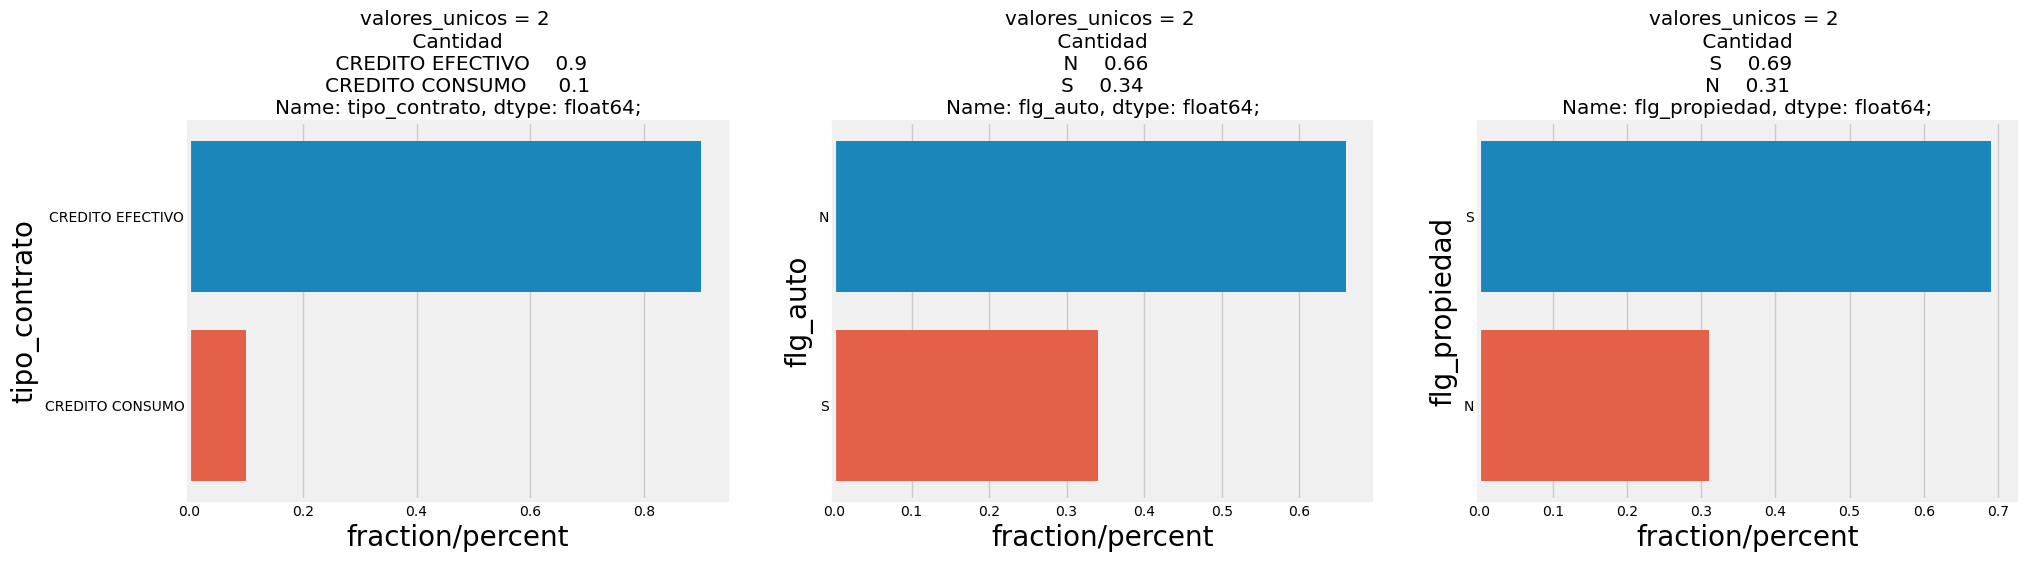

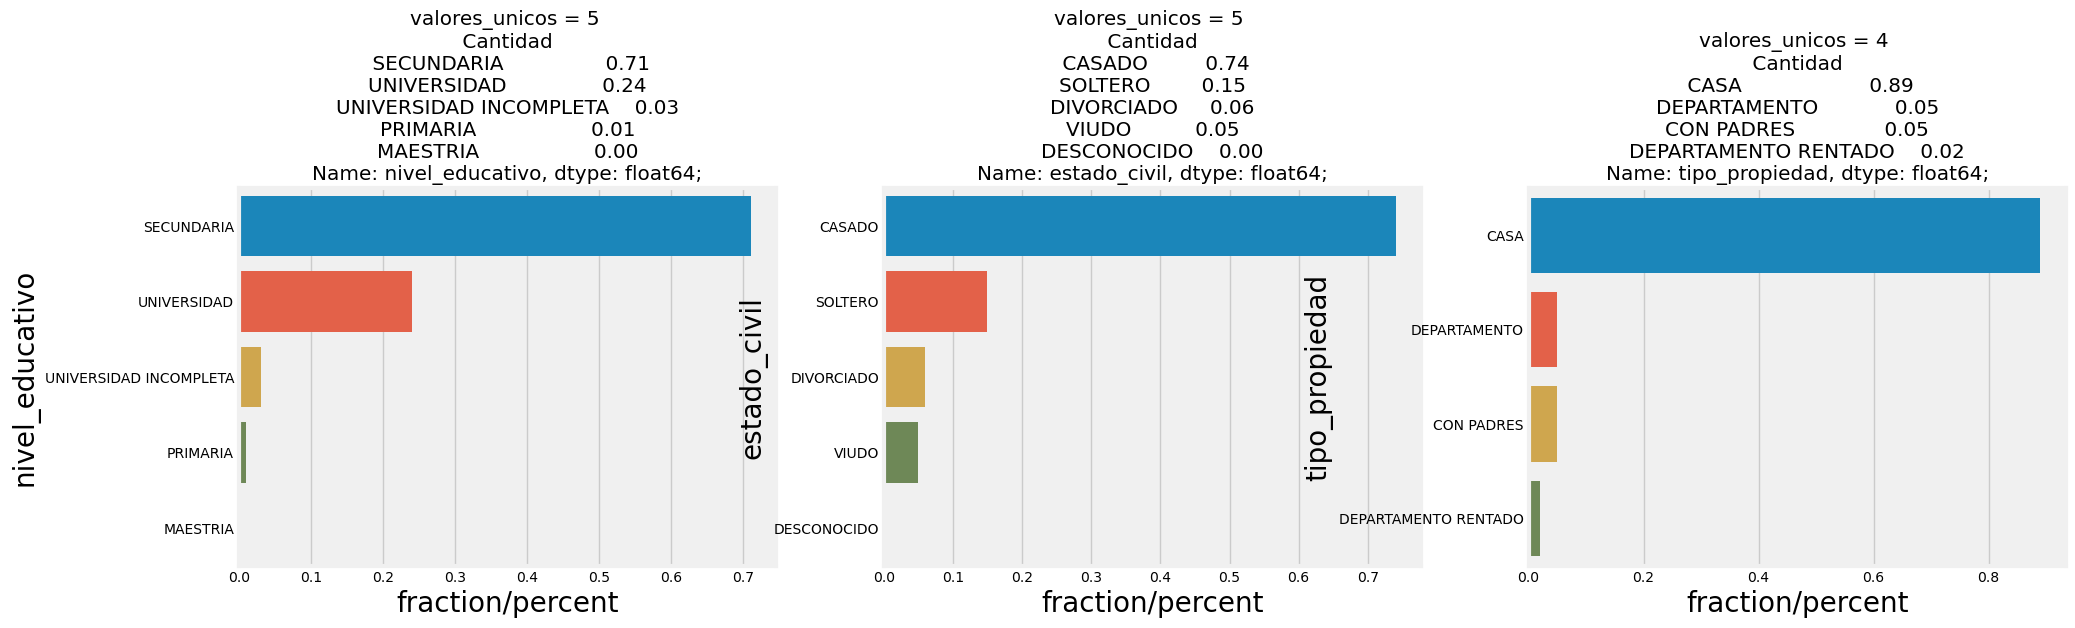

In [45]:
print('-------------------------------VARIABLES CATEGORICAS DE DATA DE CREDITOS-------------------------------')

UVA_category(df, features_df_cat[:3])
UVA_category(df, features_df_cat[3:])

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b>De los gráficos superiores se puede observar los siguiente:
    <br>
        <ol>
            <li>La mayor cantidad de creditos otorgados son a personas casadas, 74%.</li>
            <li>La mayor cantidad de creditos otorgados son a personas con casa propia, 89%.</li>
            <li>El 90% de los créditos de la base corresponden al tipo efectivo.</li>
        </ol>        
    </span>    
</div>


In [46]:
features_dfhist_numeric = ['mto_credito','mto_cuota']
features_dfhist_cat = ['tipo_contrato']

-------------------------------VARIABLES NUMERICAS DE DATA DE CREDITOS HISTORICAS-------------------------------


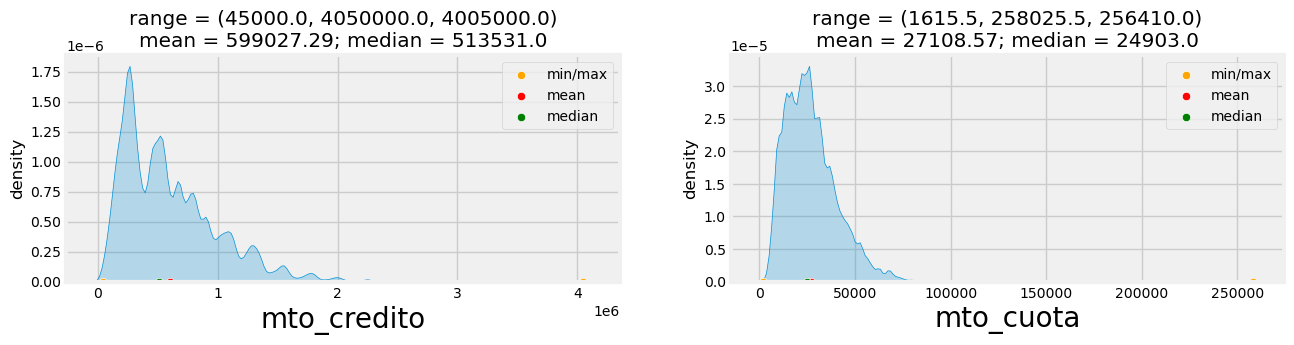

In [47]:
print('-------------------------------VARIABLES NUMERICAS DE DATA DE CREDITOS HISTORICAS-------------------------------')
UVA_numeric(df, features_dfhist_numeric)

-------------------------------VARIABLES CATEGORICAS DE DATA DE CREDITOS HISTORICAS-------------------------------


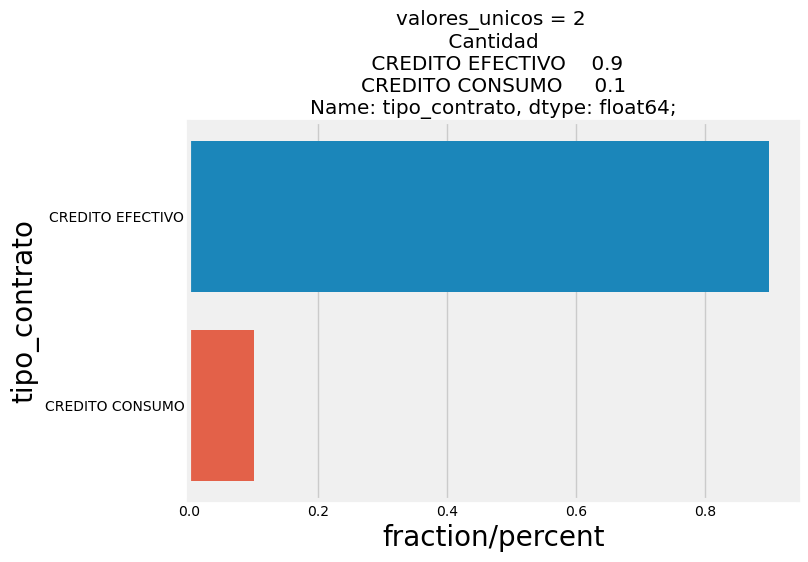

In [48]:
print('-------------------------------VARIABLES CATEGORICAS DE DATA DE CREDITOS HISTORICAS-------------------------------')

UVA_category(df, features_dfhist_cat)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b>De los gráficos superiores se puede observar los siguiente:
    <br>
        <ol>
            <li>Tanto la variable de monto de credito y de cuota presentan outliers, por lo cual se podría generar una variable según rangos</li>
            <li>El 90% de los creditos historicos son del tipo Credito Efectivo</li>
        </ol>        
    </span>    
</div>

#### <a id="imp_trans" style="color:black">3.2. Imputacion y Tranformación de Variables</a> 

In [49]:
#Funcion para obtener las columnas con valores nulos

def func_var_nul(df):
    
    list_nulls = []
    for col in list(df.columns):
        if(df[col].isnull().sum() != 0):
            list_nulls.append(col)
    return print(list_nulls)

In [50]:
func_var_nul(df)

func_var_nul(df_hist)

['ingreso', 'nivel_educativo', 'cant_miemb_familia']
[]


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b>De las variables con nulos con los que se realizará la imputación se tiene lo siguiente:
    <br>
        <ol>
            <li>Solo el DataFrame de data de créditos tiene variables con nulos, 1 numérica(ingreso) y 2 categóricas(nivel edu. y cant miembros de familia) </li>
            <li>Para las variables numericas se realizará imputación con la mediana debido a su presencia de Outliers visto en las gráficas previas, y para la categórica con la moda</li>
        </ol>        
    </span>    
</div>

In [51]:
def processing_feature_eng(df, cols_zero = None,cols_median = None , cols_mean = None, cols_cat = None):  
   
    
    ###  Proceso de imputacion ###
    
    ### Tipos de imputación
    ### cero
    if cols_zero != None:
        for col in [cols_zero]:
            df[col].fillna(0, inplace = True) 

    ### mediana
    if cols_median != None:
        for col in [cols_median]:
            df[col].fillna(df[col].median(), inplace = True)
    
    ### media
    if cols_mean != None:
        for col in [cols_mean]:
            df[col].fillna(df[col].mean(),axis=0)

    ### otros
    if cols_cat != None:
        for col in [cols_cat]:
            df[col].fillna(df[col].mode()[0], inplace = True) 

    #print('** generando nueva variables... ')

    ### creacion nueva variables
    
    #Solo se ejecutara para el primer dataframe
    if('dias_nacimiento' in (list(df.columns))):
        
        #Se obtiene la edad
        df['edad'] = df['dias_nacimiento'] // 365
        bins = [0,20,30,40,50,100]
        slots = ['0-20','20-30','30-40','40-50','50 above']
        df['edad_grupo']=pd.cut(df['edad'],bins=bins,labels=slots)
        
        #Se obtiene los años de empleo
        df['tiempo_empleo'] = df['dias_empleo'] // 365
        bins = [-1,5,10,20,30,40,50,60,1500]
        slots = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']
        df['tiempo_empleo_grupo']=pd.cut(df['tiempo_empleo'],bins=bins,labels=slots)
        
        #Se obtiene los rangos de ingreso
        df['ingreso']=df['ingreso']/100000
        bins = [0,0.5,1,1.5,2,2.5,3,11]
        slot = ['0-50K','50K-100K', '100k-150k','150k-200k','200k-250k','250k-300k','300k-Above']
        df['ingreso_rango']=pd.cut(df['ingreso'],bins,labels=slot)
        
        #Se eliminan variables irrelevantes
    
    
    #Se obtiene los rangos de los montos de los creditos
    df['mto_credito']=df['mto_credito']/100000
    bins = [0,1,2,3,4,5,6,7,8,9,10,100]
    slots = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']
    df['mto_credito_rango']=pd.cut(df['mto_credito'],bins=bins,labels=slots)
    
    
    ### generacion variables categoricas
    
    if('flg_auto' in (list(df.columns))):
        df["flg_auto"] = pd.Series(np.where(df.flg_auto.isin(['S']),1,0))
        df["flg_propiedad"] = pd.Series(np.where(df.flg_propiedad.isin(['S']),1,0))

    return df


In [52]:
# Se ejecuta la funcion para limpieza de variables
variables_mediana = ['ingreso','cant_miemb_familia']
variables_categoricas = ['nivel_educativo','flg_auto']

df = processing_feature_eng(df, variables_mediana, variables_categoricas)


In [53]:
# Se agrupara los creditos historicos para calcular una nueva variable de cantidad de creditos previos y poder cruzar ambas bases

df_hist = df_hist[['id_credito','id_credito_prev']].groupby('id_credito').count().reset_index()

df_hist.rename(columns = {'id_credito_prev':'cantidad_creditos_previos'}, inplace = True)

In [54]:
# Se cruzan ambas tablas por la llave "id_credito" para agregar la variable de cantidad de creditos previos

df = df.merge(df_hist, on = 'id_credito', how = 'left')  #right , inner (solo si aparece en ambos Dataframes)

# Se completa con 0 los nulos de la nueva variable, pues indica que no tuvo creditos previos

df.cantidad_creditos_previos.fillna(0, inplace = True) 

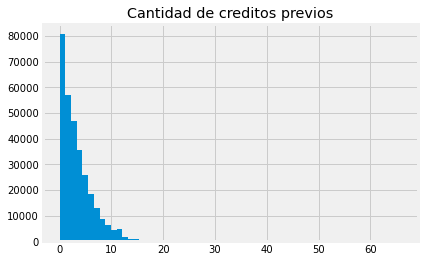

In [55]:
# Graficamos la nueva variable para poder agruparla
plt.hist(df['cantidad_creditos_previos'], bins=60)
plt.title('Cantidad de creditos previos')
plt.show() ;

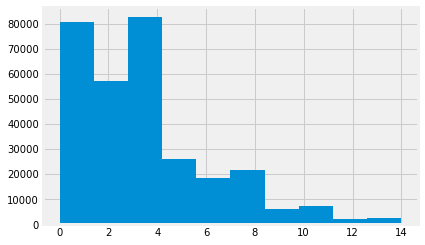

In [56]:
# Graficamos la nueva variable para poder agruparla

plt.hist(df[df['cantidad_creditos_previos']<15]['cantidad_creditos_previos'])
plt.show() 


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b>De los gráficos superiores se puede observar los siguiente:
    <br>
        <ol>
            <li>Esta variable tiene presencia de Outliers, por lo que convendría agruparla</li>
            <li>Aquellos que tengan desde 4 creditos previas a más se podrían agrupar en 1 solo grupo, dado que su distribución comienza a disminuir desde ese valor</li>
        </ol>        
    </span>    
</div>

In [57]:
#Se obtiene los rangos de la cantidad de los creditos

bins = [0,1,2,3,4,70]
slots = ['0','1', '2','3','4 above']
df['cantidad_creditos_previos']=pd.cut(df['cantidad_creditos_previos'],bins=bins,labels=slots)

#### <a id="analisis_biv" style="color:black">3.3. Análisis Bivariado</a> 

In [58]:
def bivariate_categorical(feature,ylog=False,label_rotation=False,horizontal_layout=True):
    temp = df[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Numbero de creditos': temp.values})

    # Calcula el porcentaje de los impagos
    cat_perc = df[[feature, 'pago_atrasado']].groupby([feature],as_index=False).mean()
    cat_perc["pago_atrasado"] = cat_perc["pago_atrasado"]*100
    cat_perc.sort_values(by='pago_atrasado', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))
        
    # 1. Subplot 1: 
    s = sns.countplot(ax=ax1, 
                    x = feature, 
                    data=df,
                    hue ="pago_atrasado",
                    order=cat_perc[feature],
                    palette=['g','r'])
    
    # Define el estilo
    ax1.set_title(feature, fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'}) 
    ax1.legend(['Pago','Impago'])
    
    # log scale.
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})   
    
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    # 2. Subplot 2
    s = sns.barplot(ax=ax2, 
                    x = feature, 
                    y='pago_atrasado', 
                    order=cat_perc[feature], 
                    data=cat_perc,
                    palette='Set2')
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Porcentaje de creditos que no se pagaron [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(feature + " Impago %", fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 

    plt.show();

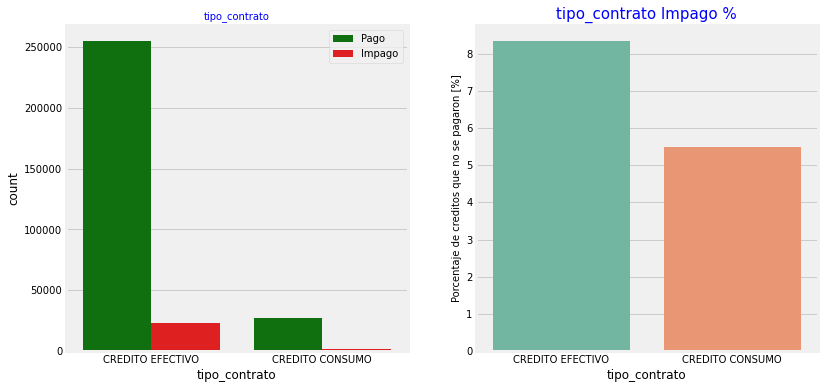

In [59]:
bivariate_categorical('tipo_contrato')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferencia: </b> <br>Tipo Contrato: Los creditos consumo son solo una pequeña fracción (10%) del número total de creditos; al mismo tiempo, una mayor cantidad de creditos consumo, en comparación con su frecuencia, no son pagados. 
    </span>    
</div>

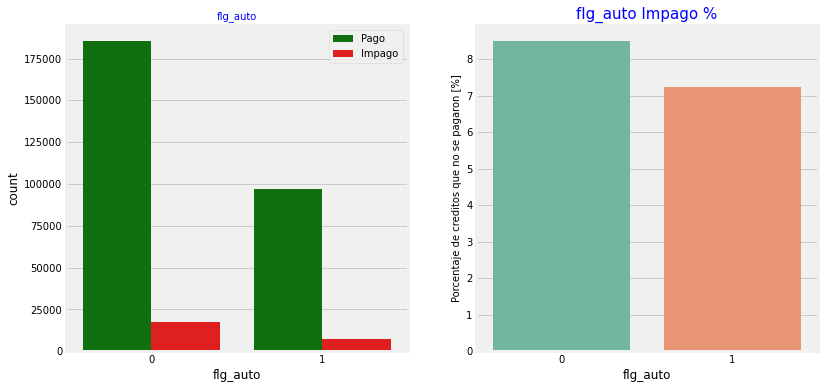

In [60]:
bivariate_categorical('flg_auto')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferencia: </b> 
        <br>Los clientes que tienen auto son la mitad de los clientes que no tienen auto. Pero según el porcentaje de impago, no existe una correlación entre poseer un auto y el pago del préstamo, ya que en ambos casos el porcentaje de impago es casi el mismo.      
    </span>    
</div>

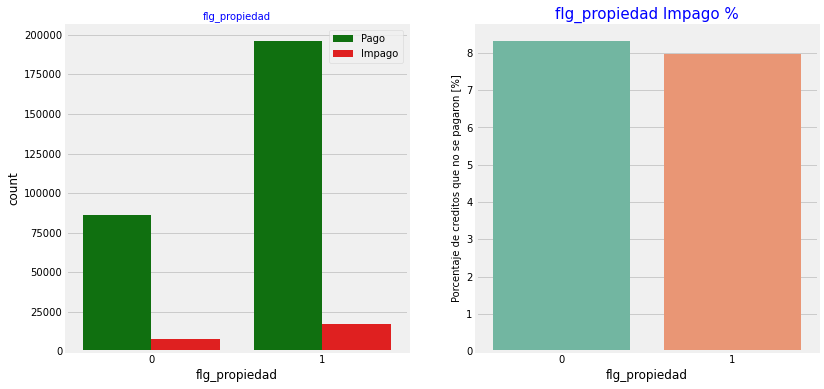

In [61]:
bivariate_categorical('flg_propiedad')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferencias: </b> 
        <br>Los clientes propietarios de una propiedad son más del doble de los no propietarios. Pero la tasa de incumplimiento de ambas categorías es aproximadamente la misma (~8%). Por lo tanto, no existe una correlación entre poseer una propiedad y no pagar el préstamo.      
    </span>    
</div>

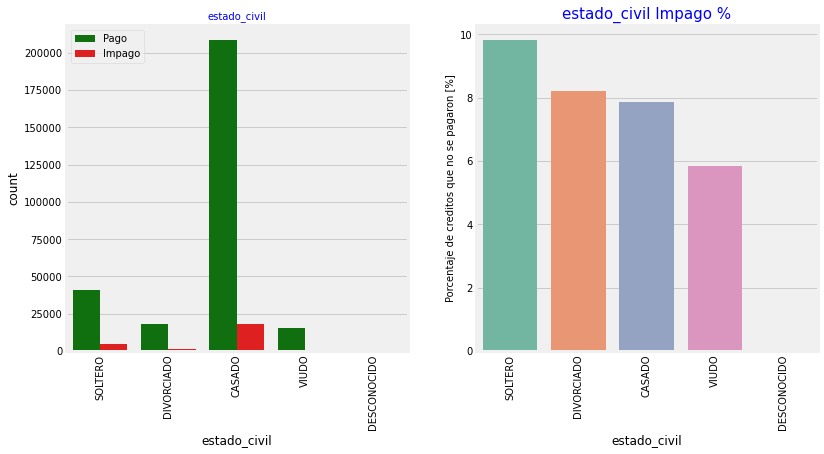

In [62]:
bivariate_categorical("estado_civil",False,True,True)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferencias: </b> 
        <ol>
            <li>La mayoría de los clientes con préstamo son Casados, seguidas de Solteros y Divorciados. </li>
            <li>En términos de porcentaje de impago del préstamo, los solteros tiene el porcentaje más alto de no devolución (10 %), siendo los viudos el más bajo (la excepción es Desconocida). </li>
        </ol>
    </span>    
</div>

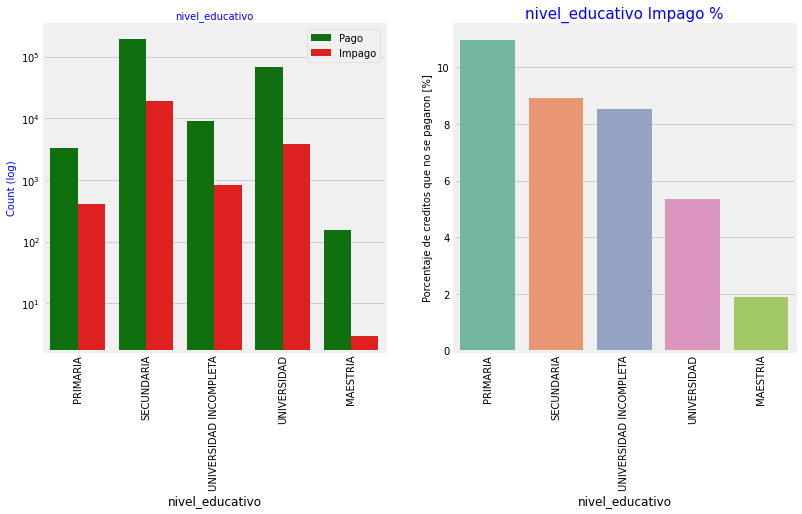

In [63]:
bivariate_categorical("nivel_educativo",True,True,True) 

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferencias: </b> 
        <ol>
            <li>La mayoría de los clientes tienen educación secundaria, seguida por los clientes con nivel universitario.</li>
            <li>La categoría de Primaria, tiene la mayor tasa de impago del préstamo (11%). Las personas con grado académico de maestria tienen una tasa de impago inferior al 2%. </li>
        </ol>
    </span>    
</div>

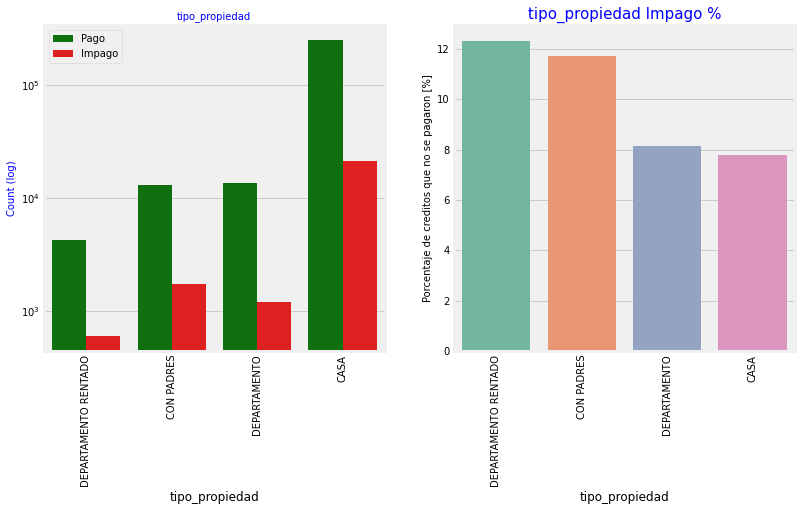

In [64]:
bivariate_categorical("tipo_propiedad",True,True,True) 

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferencias: </b> 
        <ul>
            <li>La mayor cantidad de clientes tienen una casa, mientras que un pequeño grupo tiene departamento rentado</li>  
            <li>Los clientescon Departamento Rentado y los que viven con sus padres tienen la mayor tasa de impago (~12%), mientras que los que tienen departamento o casa tienen una tasa de impago menor(~8%)</li>
        </ul>
    </span>    
</div>

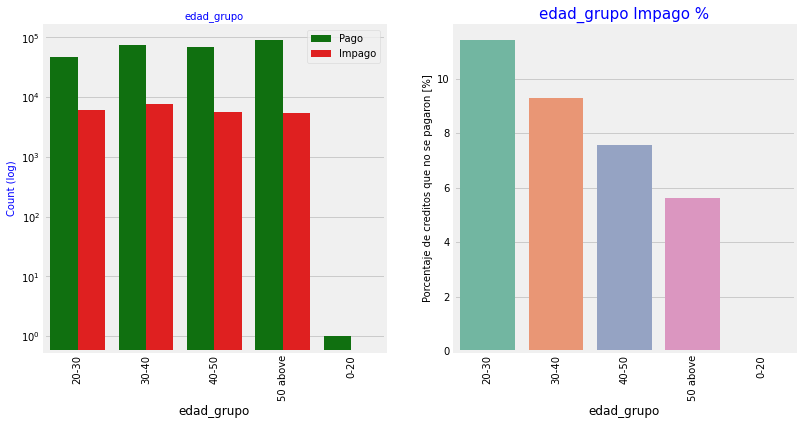

In [65]:
bivariate_categorical("edad_grupo",True,True,True) 

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferencias: </b> 
        <ol>
            <li>Los clientes en el grupo de 20-30 años tienen mayor ratio de impago(~12%)</li>
            <li>Los clientes con más de 50 años tienen menor ratio de impago(~6%) </li>
        </ol>
    </span>    
</div>

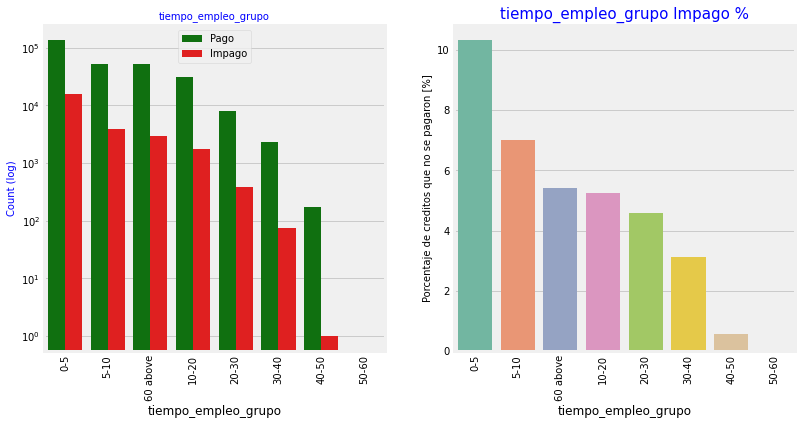

In [66]:
bivariate_categorical("tiempo_empleo_grupo",True,True,True) 

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferencias: </b> 
        <ol>
            <li>Los grupos de tiempo de empleo tienen valores muy cercanos, sin embargo si tienen una diferencia en su ratio de impago</li>
            <li>Aquellos con menos de 5 años con tiempo de empleo tienen el mayor ratio de impago(~10%), mientras que los demás grupos no superan el ~7% </li>
        </ol>
    </span>    
</div>

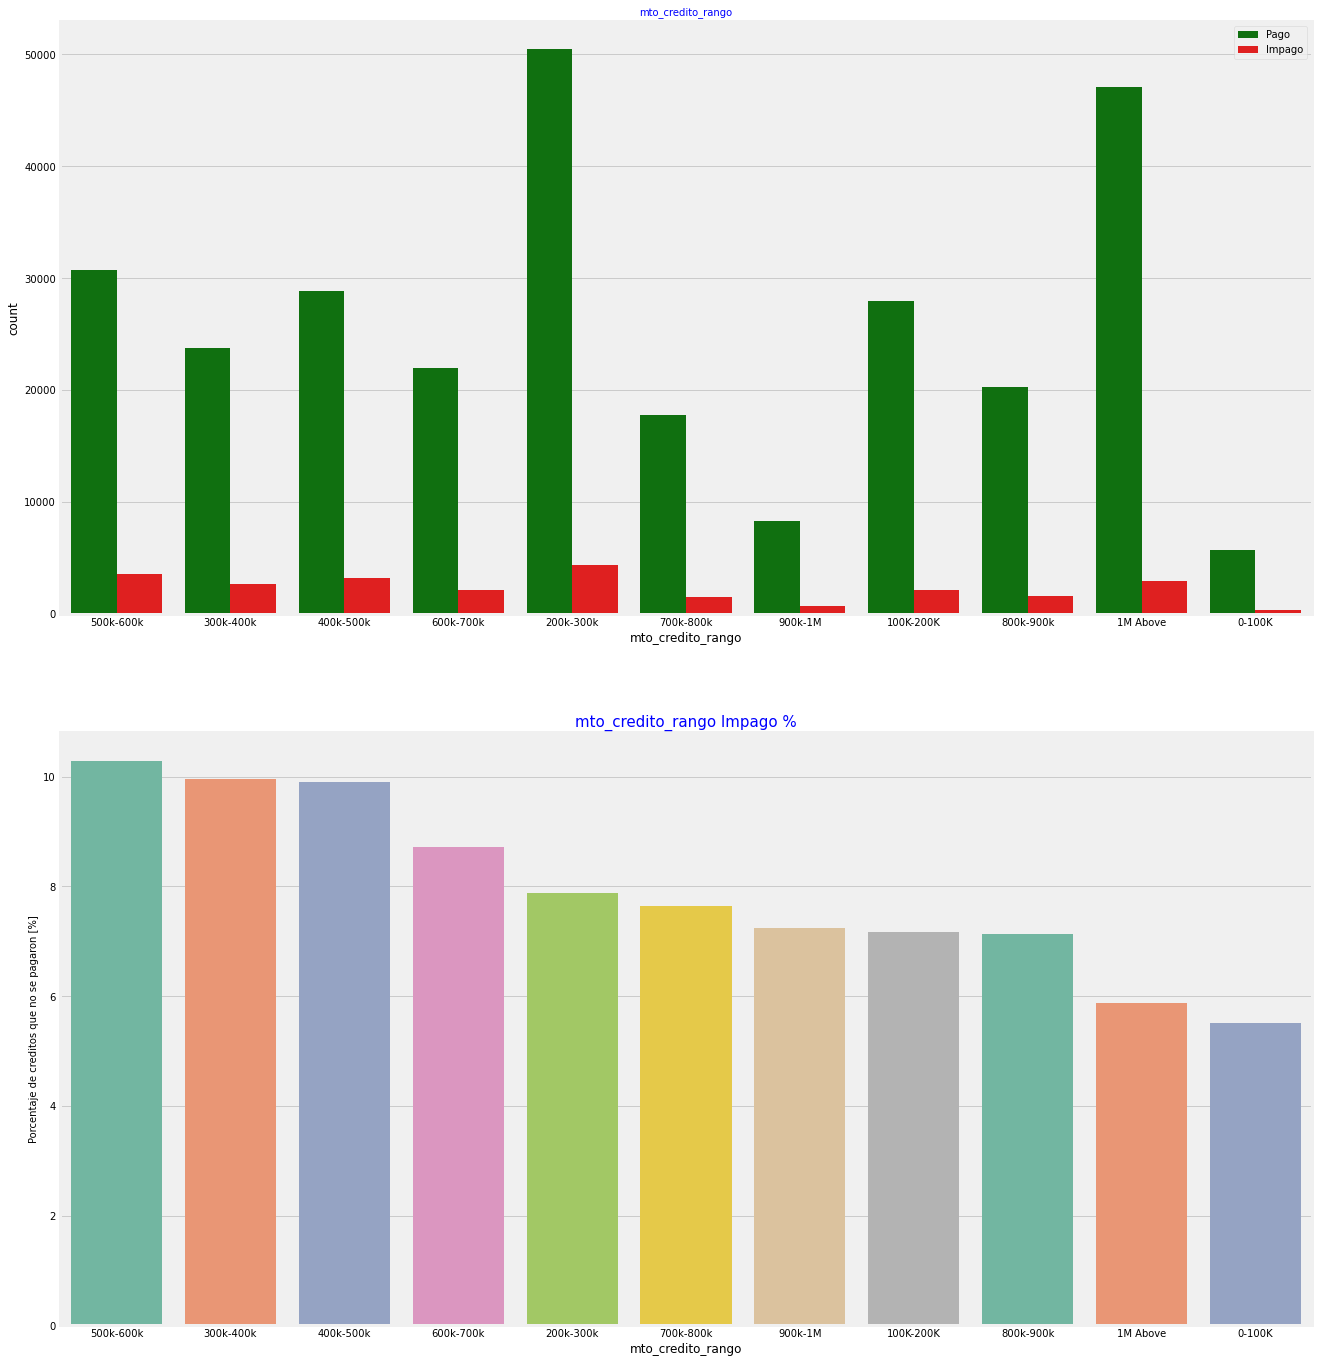

In [67]:
bivariate_categorical("mto_credito_rango",False,False,False)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferencias: </b> 
        <ol>
            <li>Los clientes con ingresos entre 500-600k tienen el mayor ratio de impago (~10%)</li>
        </ol>
    </span>    
</div>

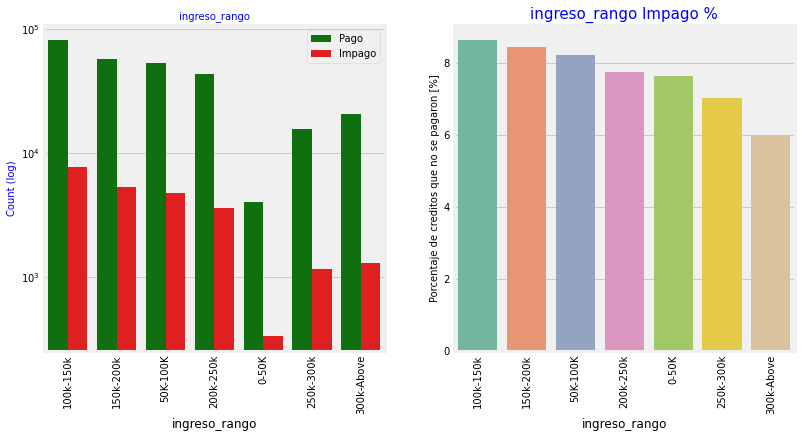

In [68]:
bivariate_categorical("ingreso_rango",True,True) 

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferencias: </b> 
        <ol>
            <li>Los clientes con mayor ratio de impago son los que tienen ingresos entre 100k y 150k(~8%)</li>
        </ol>
    </span>    
</div>

In [69]:
# Se define la funcion para análisis multivariado

def multivariate_features(col_x, col_y):
    plt.figure(figsize=(10,6))
    sns.barplot(data =df, y=col_y,hue='pago_atrasado',x=col_x,)
    plt.title(col_x+' vs '+col_y)
    plt.show()

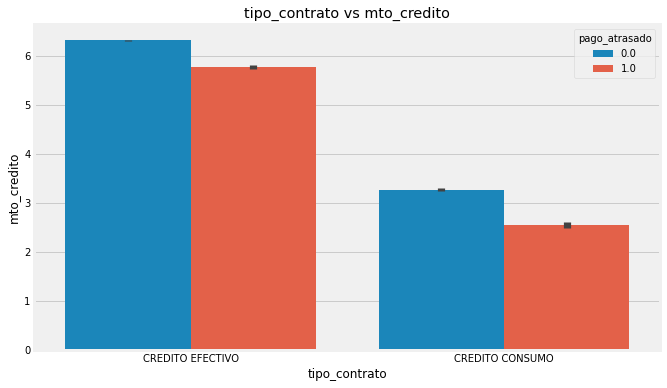

In [70]:
multivariate_features('tipo_contrato','mto_credito')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferencias: </b> 
        <ol>
            <li>El promedio del monto de los créditos efectivos es casi el doble del de crédito consumo(6 y 3 respectivamente)</li>
            <li>Para ambos tipos de créditos, los créditos que fueron pagados e impagados tienen montos cercanos, lo cual no es un buen indicador</li>
        </ol>
    </span>    
</div>

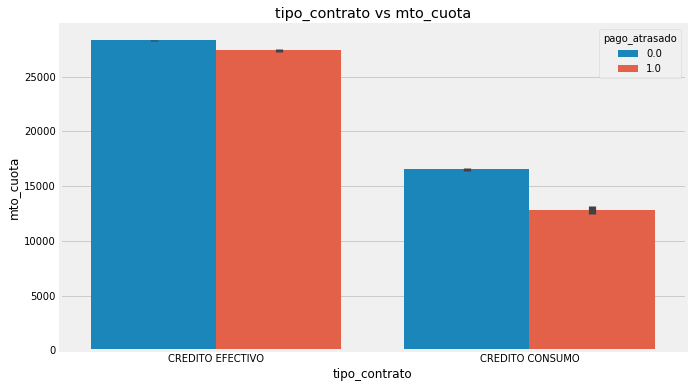

In [71]:
multivariate_features('tipo_contrato','mto_cuota')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferencias: </b> 
        <ol>
            <li>Al igual que con los montos de los créditos, las cuotas de los créditos efectivos son mayores a los de consumo(25k y 15k)</li>
        </ol>
    </span>    
</div>

### <a id="conclusion" style="color:black">4. Conclusiones</a>

<div class="alert alert-block alert-success">
    <span style='font-family:Georgia'>
        <b>Factores Decisivos para clientes con alta probabilidad de Pago: </b> 
        <ol>
            <li>Tipo de Educacion: Los clientes con grado universitario o maestría tienen los mejores ratios de Pago, mayores de 95% </li>
            <li>Estado Civil: los clientes viudos tienen el mejor ratio de pago, 94%.</li>
            <li>Edad: las personas mayores de 50 años tienen pocas probabilidades de incumplimiento</li>
            <li>Tiempo de Empleo: Clientes con más de 40 años de experiencia tienen una tasa de morosidad inferior al 1%</li>
            <li>Ingreso: Los solicitantes con ingresos superiores a 300k tienen menos probabilidades de incumplimiento</li>
        </ol>
    </span>    
</div>

<div class="alert alert-block alert-danger">
    <span style='font-family:Georgia'>
        <b>Factores Decisivos para clientes con alta probabilidad de Impago:: </b> 
        <ol>
            <li>Estado Civil: Los clientes solteros presentan el mayor ratio de impago(~10%) </li>
            <li>Tipo de Propiedad : Los clientes con departamento rentado presentan 12% de ratio de impago, siendo el mayor. </li>
            <li>Nivel Educativo: El nivel educativo primario presenta un ratio de impago de 11% </li>
            <li>Tiempo de Empleo: Los clientes con menos de 5 años de empleo tienen un ratio de impago de 12%, siendo el mayor entre los rangos</li>
        </ol>
    </span>    
</div>

### Ejercicios

In [72]:
df.head(2)

,id_credito,pago_atrasado,tipo_contrato,flg_auto,flg_propiedad,cant_hijos,ingreso,mto_credito,mto_cuota,nivel_educativo,...,dias_nacimiento,dias_empleo,cant_miemb_familia,edad,edad_grupo,tiempo_empleo,tiempo_empleo_grupo,ingreso_rango,mto_credito_rango,cantidad_creditos_previos
0,100002.0,1.0,CREDITO EFECTIVO,0,1,0.0,2.025,4.065975,24700.5,SECUNDARIA,...,9461.0,637.0,1.0,25.0,20-30,1.0,0-5,200k-250k,400k-500k,0
1,100003.0,0.0,CREDITO EFECTIVO,0,0,0.0,2.700,12.935025,35698.5,UNIVERSIDAD,...,16765.0,1188.0,2.0,45.0,40-50,3.0,0-5,250k-300k,1M Above,2


1. Transformar los valores de la variable tipo_contrato a minuscula

Solucion 
<!---
df['tipo_contrato'] = df['tipo_contrato'].str.lower()
-->

2. Filtrar aquellos registros que tengan un mto_cuota mayor a 10000 y más de 1 hijo (cant_hijos) y calcular cuántos son

Solucion 
<!---
df[(df['mto_cuota']>10000)&(df['cant_hijos']>0)]
-->


3. Realizar un gráfico de densidad de la variable mto_credito en el que se muestre los valores dentro del percentil 5% hasta el 95%

Solucion
<!---
df[(df['mto_cuota']>10000)&(df['cant_hijos']>0)]
data_percentil = df[(df['mto_credito']>=df.mto_credito.quantile(0.05))&
                    (df['mto_credito']<=df.mto_credito.quantile(0.95))]

sns.kdeplot(data=data_percentil['mto_credito']) 
-->